# Loading the dependencies

In [3]:
# ! pip install pandas-profiling

# Loading the data

In [4]:
import pandas as pd

# Path to your CSV file
csv_path = '/Users/mac/Desktop/Summer_2023/datathon/pulseox_dataset.csv'

# Read the CSV file using Pandas
df_initial = pd.read_csv(csv_path, low_memory=False)

# Data Preprocessing

In [5]:
df_initial

,unique_subject_id,unique_hospital_admission_id,unique_icustay_id,subject_id,hospital_admission_id,icustay_id,source_db,hospitalid,numbedscategory,teachingstatus,...,delta_sofa_future_coagulation_24hr,sofa_future_coagulation_24hr,delta_sofa_future_liver_24hr,sofa_future_liver_24hr,delta_sofa_future_cardiovascular_24hr,sofa_future_cardiovascular_24hr,delta_sofa_future_cns_24hr,sofa_future_cns_24hr,delta_sofa_future_renal_24hr,sofa_future_renal_24hr
0,0,0,0,002-10050,183274,211144,eicu,71,100 - 249,False,...,1525.0,1.0,1525.0,0.0,1525.0,1.0,1525.0,0.0,1525.0,0.0
1,1,1,1,002-1007,178462,204935,eicu,71,100 - 249,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2,2,002-10187,150828,169525,eicu,73,>= 500,True,...,1547.0,0.0,1547.0,0.0,1547.0,1.0,1547.0,0.0,1547.0,0.0
3,3,3,3,002-10306,198249,230427,eicu,63,100 - 249,False,...,1507.0,2.0,1507.0,0.0,1507.0,1.0,1507.0,0.0,1507.0,1.0
4,4,4,4,002-10324,188445,217835,eicu,73,>= 500,True,...,1537.0,1.0,1537.0,0.0,1537.0,1.0,1537.0,2.0,1537.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49088,44897,49088,49088,19995595,21784060,34670930,mimic_iv,9999,>= 500,True,...,1500.0,0.0,1500.0,2.0,1500.0,1.0,1500.0,0.0,1500.0,1.0
49089,44898,49089,49089,19995780,21942461,36805359,mimic_iv,9999,>= 500,True,...,1557.0,2.0,1557.0,0.0,1557.0,1.0,1557.0,2.0,1557.0,0.0
49090,44899,49090,49090,19997293,28847872,31877557,mimic_iv,9999,>= 500,True,...,1557.0,0.0,1557.0,0.0,1557.0,1.0,1557.0,1.0,1557.0,1.0
49091,44900,49091,49091,19997367,20617667,35616526,mimic_iv,9999,>= 500,True,...,1557.0,3.0,1557.0,2.0,1557.0,1.0,1557.0,1.0,1557.0,1.0


In [6]:
df_initial.shape

(49093, 142)

In [7]:
# Assume 'df_initial' is your DataFrame
column_names = df_initial.columns.tolist()

print("Column names:", column_names)

Column names: ['unique_subject_id', 'unique_hospital_admission_id', 'unique_icustay_id', 'subject_id', 'hospital_admission_id', 'icustay_id', 'source_db', 'hospitalid', 'numbedscategory', 'teachingstatus', 'region', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'datetime_hospital_admit', 'datetime_hospital_discharge', 'datetime_icu_admit', 'datetime_icu_discharge', 'los_hospital', 'los_ICU', 'comorbidity_score_name', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'SaO2_timestamp', 'pH', 'pCO2', 'pO2', 'SaO2', 'SpO2', 'Carboxyhemoglobin', 'Methemoglobin', 'SpO2_timestamp', 'delta_SpO2', 'delta_vitals_heart_rate', 'vitals_heart_rate', 'delta_vitals_resp_rate', 'vitals_resp_rate', 'delta_vitals_mbp_ni', 'vitals_mbp_ni', 'delta_vitals_sbp_ni', 'vitals_sbp_ni', 'delta_vitals_dbp_ni', 'vitals_dbp_ni', 'delta_vitals_mbp_i', 'vitals_mbp_i', 'delta_vitals_sbp_i', 'vitals_sbp_i', 'delta_vitals_dbp_i', 'vitals_dbp_i', 'delta_vitals_

## A. Keeping columns relevant to our question

In [9]:
# List of columns to keep
  # should we keep the unique ids instead ??? 

columns_to_keep = ["subject_id", "hospital_admission_id", "icustay_id",
    "admission_age", "sex_female", "weight_admission", "height_admission",
    "BMI_admission", "los_hospital", "los_ICU",
    "comorbidity_score_value", "in_hospital_mortality",
    "race_ethnicity", "pH", "pO2", "SpO2", "vitals_tempc", "cbc_hemoglobin",
    "coag_inr", "bmp_sodium", "bmp_creatinine", "bmp_aniongap", "hfp_bilirubin_total", "hfp_albumin",
    "sofa_past_overall_24hr"
]

# Select only the columns you want to keep
df_filtered = df_initial[columns_to_keep]

## B. Handling Missing values

In [10]:
# Check for missing values in the entire DataFrame
missing_values = df_filtered.isna()  # or df.isnull() 

# Check if there are any missing values in the entire DataFrame
if missing_values.any().any():
    print("There are missing values in the DataFrame.")
else: 
    print("There are no missing values in the DataFrame.")

There are missing values in the DataFrame.


In [11]:
# Count the number of missing values per column
missing_values_count = df_filtered.isna().sum()

# Calculate the total number of cells in the DataFrame
total_cells = df_filtered.size

# Calculate the total number of missing values in the entire DataFrame
total_missing_values = missing_values_count.sum()

# Calculate the total percentage of missing values in the entire DataFrame
total_percentage_missing = (total_missing_values / total_cells) * 100

# Create a DataFrame to display the results
missing_data_summary = pd.DataFrame({
    'Column': df_filtered.columns,
    'Percentage Missing (%)': (missing_values_count / len(df_filtered)) * 100
})

# Print the missing data summary
print(missing_data_summary)

# Print the total percentage of missing values in the entire DataFrame
print("Total Percentage Missing in DataFrame: {:.2f}%".format(total_percentage_missing))


                                          Column  Percentage Missing (%)
subject_id                            subject_id                0.000000
hospital_admission_id      hospital_admission_id                0.000000
icustay_id                            icustay_id                0.000000
admission_age                      admission_age                0.004074
sex_female                            sex_female                0.000000
weight_admission                weight_admission                2.248793
height_admission                height_admission                2.615444
BMI_admission                      BMI_admission                4.043346
los_hospital                        los_hospital                0.000000
los_ICU                                  los_ICU                0.000000
comorbidity_score_value  comorbidity_score_value                0.004074
in_hospital_mortality      in_hospital_mortality                0.822928
race_ethnicity                    race_ethnicity   

In [12]:
# Calculate the percentage of rows (patients) with at least one missing value
percentage_rows_with_missing = (df_filtered.isnull().any(axis=1).sum() / len(df_filtered)) * 100

# Print the percentage of rows with at least one missing value
print("Percentage of rows with at least one missing value: {:.2f}%".format(percentage_rows_with_missing))

Percentage of rows with at least one missing value: 74.89%


### Imputation of missing values using regression 

### Variable Encoding
Variable encoding, also known as feature encoding or categorical encoding, is a fundamental preprocessing step in machine learning and data analysis. Its goal is to convert categorical variables (features) into a numerical format that machine learning algorithms can work with effectively. Categorical variables are those that represent categories or labels rather than numerical quantities. Encoding categorical variables is essential because many machine learning algorithms require numerical input data.

In [28]:
# Filter columns with non-numeric data types
non_numeric_columns = df_imputed.select_dtypes(exclude=['int', 'float']).columns

print("Columns with non-numeric values:")
print(non_numeric_columns)

Columns with non-numeric values:
Index(['subject_id', 'race_ethnicity'], dtype='object')


In [29]:
# Create a new DataFrame containing only the desired columns
non_numeric_columns_df = df_imputed[non_numeric_columns]

In [30]:
non_numeric_columns_df.head()

,subject_id,race_ethnicity
0,002-10050,White
1,002-1007,White
2,002-10187,White
3,002-10306,Asian
4,002-10324,White


N.B: This function converts a DataFrame into Markdown format, which is suitable for rendering as a table in various environments like Jupyter Notebook or Markdown documents.

In [33]:
# List of columns to check
columns_to_check = ['subject_id', 'race_ethnicity']

# Get unique values for each column
for column in columns_to_check:
    unique_values = df_imputed[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print() 

Unique values in subject_id:
['002-10050' '002-1007' '002-10187' ... '19997293' '19997367' '19997752']

Unique values in race_ethnicity:
['White' 'Asian' 'Black' 'Unknown' 'American Indian / Alaska Native'
 'Hispanic OR Latino' 'Native Hawaiian / Pacific Islander'
 'More Than One Race']



In [34]:
# Perform one-hot encoding for 'race_ethnicity'
df_encoded = pd.get_dummies(df_imputed, columns=['race_ethnicity'], prefix=['race'])

In [37]:
from sklearn.preprocessing import LabelEncoder


# Perform label encoding for 'subject_id'
label_encoder = LabelEncoder()
df_imputed['subject_id_encoded'] = label_encoder.fit_transform(df_imputed['subject_id'])

In [39]:
# Assume 'df_initial' is your DataFrame
column_names = df_imputed.columns.tolist()

print("Column names:", column_names)

Column names: ['subject_id', 'hospital_admission_id', 'icustay_id', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'coag_inr', 'bmp_sodium', 'bmp_creatinine', 'bmp_aniongap', 'hfp_bilirubin_total', 'hfp_albumin', 'sofa_past_overall_24hr', 'subject_id_encoded']


In [40]:
df = df_imputed

### Computing p50 and adding it to the Dataframe

In [41]:
import pandas as pd

# Assuming your DataFrame is called "df" and has columns "pO2" and "SpO2"
df['p50'] = ((100 * (df['pO2']**3) / df['SpO2']) - (df['pO2']**3))**(1/3)

In [42]:
import pandas as pd


# Define the range of interest
lower_limit = 0  # Replace with your lower limit
upper_limit = 10  # Replace with your upper limit

# Filter the DataFrame to include only values within the range
filtered_df = df[(df['p50'] >= lower_limit) & (df['p50'] <= upper_limit)]

# Count instances of each unique value within the range
value_counts = filtered_df['p50'].value_counts()

In [43]:
print("Count of unique values within the specified range:")
print(value_counts)

Count of unique values within the specified range:
0.000000    17851
0.000488       31
0.000775       24
0.000977       15
0.000388        7
0.001953        7
0.000615        6
0.001550        5
9.295157        4
0.001230        4
8.646658        3
9.078990        3
8.862824        3
8.430491        2
9.943656        2
8.214325        2
9.727490        2
0.000308        2
0.003100        1
0.002461        1
4.971828        1
9.338390        1
7.998158        1
8.906057        1
9.662640        1
9.100607        1
7.846842        1
3.799976        1
9.468090        1
9.511323        1
7.349659        1
9.564656        1
Name: p50, dtype: int64


In [44]:
df['p50']

0        26.994894
1        43.471717
2        31.547938
3         0.000000
4        57.128729
           ...    
49088    32.603787
49089    22.187561
49090    26.234485
49091    23.778308
49092     0.000000
Name: p50, Length: 49093, dtype: float64

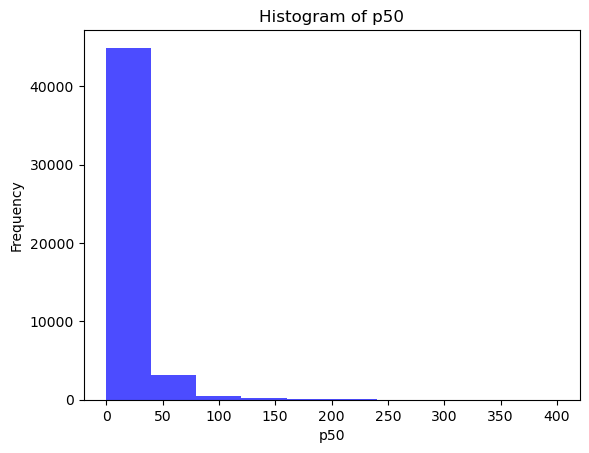

In [45]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is called "your_data" and has a column "p50"
plt.hist(df['p50'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of p50')
plt.xlabel('p50')
plt.ylabel('Frequency')
plt.show()

### Exlusion groups based on non physiologically values

In [46]:
# for p50 

# Numbers in the range (<10,>50) are not physiologically possible 
# Primary outcome so all values should be whithin the range 

sample_df_new = df[(df['p50'] > 10) & (df['p50'] < 50)]

In [47]:
column_names_final = sample_df_new.columns.tolist()

print("Column names:", column_names_final)

Column names: ['subject_id', 'hospital_admission_id', 'icustay_id', 'admission_age', 'sex_female', 'weight_admission', 'height_admission', 'BMI_admission', 'los_hospital', 'los_ICU', 'comorbidity_score_value', 'in_hospital_mortality', 'race_ethnicity', 'pH', 'pO2', 'SpO2', 'vitals_tempc', 'cbc_hemoglobin', 'coag_inr', 'bmp_sodium', 'bmp_creatinine', 'bmp_aniongap', 'hfp_bilirubin_total', 'hfp_albumin', 'sofa_past_overall_24hr', 'subject_id_encoded', 'p50']


In [48]:
## for ph 

# Assuming your DataFrame is called "your_data" and has a column "ph"
sample_df_new['pH'] = sample_df_new[sample_df_new['pH'] <= 7.81]['pH']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_1201/3667339608.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['pH'] = sample_df_new[sample_df_new['pH'] <= 7.81]['pH']


In [49]:
## for cbc_hemoglobin
sample_df_new['cbc_hemoglobin'] = sample_df_new[sample_df_new['cbc_hemoglobin'] <= 20]['cbc_hemoglobin']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_1201/365939063.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['cbc_hemoglobin'] = sample_df_new[sample_df_new['cbc_hemoglobin'] <= 20]['cbc_hemoglobin']


In [50]:
## BMI_admission
sample_df_new['BMI_admission'] = sample_df_new[sample_df_new['BMI_admission'] <= 100]['BMI_admission']

/var/folders/sw/5f53r1m13rq2jww8lqgbks700000gn/T/ipykernel_1201/2112235615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df_new['BMI_admission'] = sample_df_new[sample_df_new['BMI_admission'] <= 100]['BMI_admission']


### Profile Report

In [ ]:
# import pandas as pd
# import pandas_profiling  # Import the pandas_profiling library
# from pandas_profiling import ProfileReport

# # sample_df = df_cleaned_fromMissing.sample(frac=0.1)  # Use 50% of the data for profiling

# # Generate a profile report for the DataFrame
# # profile = pandas_profiling.ProfileReport(sample_df, pool_size=4) 
# profile = pandas_profiling.ProfileReport(sample_df)

N.B: Very computationally heavy. Thus we are: 
* Only using a percentage of the data for profiling
* Parallel Processing: If your system supports it, you can enable parallel processing using the pool_size parameter. This can help distribute computations across multiple CPU cores.
* Turn Off Specific Analyses: The pandas_profiling.ProfileReport() function has several parameters that allow you to customize the analyses performed. For example, you can turn off correlation computations or histogram calculations if they are not essential for your analysis.




### Removing outliers

- **Reason to Remove Outliers: Impact on Clustering:** Outliers can significantly affect the results of clustering algorithms like k-means. Clusters might be pulled or stretched due to the presence of outliers, leading to suboptimal results.
- **Reason to Keep Outliers: Algorithm Robustness:** Some clustering algorithms, like hierarchical clustering or DBSCAN, are more robust to the presence of outliers. They might naturally form separate clusters or noise groups.

### Dimentionality reduction
Performing dimensionality reduction before clustering might not be the best approach, as our primary goal is  to understand the characteristics and differences among clusters based on certain features (like gender),

### Normasation and Standarization: 
If needed, normalize or standardize your data to ensure that features with different scales don't disproportionately influence the clustering process.

In [ ]:
# # IF NORMALISATION IS NEEDED  
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # Select columns to standardize
# # columns_to_standardize = ['valence', 'speechiness', 'loudness', 'liveness' , 'instrumentalness', 'energy', 'duration_ms', 'danceability', 'acousticness', 'popularity', 'instance_id']

# # Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler to the selected columns
# scaler.fit(df_imputed)

# # Transform the selected columns
# df_imputed = scaler.transform(df_imputed)

# Clustering

## Choosing the Number of Clusters (K)

- The choice of K (number of clusters) is crucial. There are several methods to help you determine an optimal K, such as the elbow method, silhouette score, or gap statistic. These methods can help you decide on an appropriate number of clusters based on your data.
    
Working with unsupervised clustering to get the clusters from the data

## K means 

### Elbow Method

The elbow method is a heuristic technique used to determine the optimal number of clusters in a clustering algorithm, such as k-means. It is called the "elbow method" because when the number of clusters increases, the reduction in within-cluster sum of squares (inertia) tends to form an "elbow" shape on a plot. The point where the reduction starts to slow down represents a reasonable estimate of the optimal number of clusters.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# List to store the within-cluster sum of squares (inertia) for different k values
inertia_values = []

# Range of k values to test
k_range = range(1, 11)

# Calculate inertia for each k value
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_imputed)
    inertia_values.append(kmeans.inertia_)


We plot the elbow curve to visualize the inertia values for different k values. The "elbow" point in the plot represents a point of diminishing returns, indicating the optimal number of clusters.

In [ ]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In your plotted graph, look for the point where the inertia starts decreasing more slowly after an initial steep drop. This point is usually considered the "elbow" and represents a good choice for the number of clusters.

Keep in mind that sometimes the elbow might not be very clear, especially in complex datasets. In such cases, you might need to make a subjective decision based on the trade-off between simplicity (fewer clusters) and capturing meaningful structure in your data (more clusters).

Once you've identified the point, the corresponding value of 'k' is a reasonable choice for the number of clusters in your KMeans clustering analysis.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you've already determined that 2 is the optimal number of clusters
num_clusters = 2

# Create a KMeans model with the chosen number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(df_imputed)  # Fit the model

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Visualize the clusters and data points
plt.figure(figsize=(8, 6))

# Plot data points with different colors for each cluster
for cluster_id in range(num_clusters):
    plt.scatter(
        df_imputed['SpO2'][cluster_labels == cluster_id],  # Replace with your desired feature 1 column
        df_imputed['pO2'][cluster_labels == cluster_id],  # Replace with your desired feature 2 column
        label=f'Cluster {cluster_id}'
    )

plt.xlabel('SpO2')  # Replace with your desired x-axis label
plt.ylabel('pO2')  # Replace with your desired y-axis label
plt.title('Cluster Visualization')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# Create a grid of points along the line formed by 'SpO2' and 'pO2'
num_points = 100
min_SpO2 = df_imputed['SpO2'].min()
max_SpO2 = df_imputed['SpO2'].max()
min_pO2 = df_imputed['pO2'].min()
max_pO2 = df_imputed['pO2'].max()

grid_SpO2, grid_pO2 = np.meshgrid(
    np.linspace(min_SpO2, max_SpO2, num_points),
    np.linspace(min_pO2, max_pO2, num_points)
)

# Interpolate 'pH' values for the grid points
grid_pH = griddata(
    (df_imputed['SpO2'], df_imputed['pO2']),
    df_imputed['pH'],
    (grid_SpO2, grid_pO2),
    method='cubic'
)

# Create the plot
plt.figure(figsize=(12, 8))

# Plot the interpolated pH values as a contour plot
contour = plt.contourf(grid_SpO2, grid_pO2, grid_pH, levels=20, cmap='viridis')
plt.colorbar(contour, label='pH')

# Scatter plot of the actual data points
plt.scatter(df_imputed['SpO2'], df_imputed['pO2'], c=df_imputed['pH'], cmap='viridis', alpha=0.7)

plt.xlabel('SpO2')
plt.ylabel('pO2')
plt.title('pH Variation Along SpO2 and pO2 Line')

plt.grid(True)
plt.show()


In [ ]:
import seaborn as sns

# Replace 'variable' with the actual column name of the variable
variable_data = df_imputed['pH']

mean_value = variable_data.mean()
median_value = variable_data.median()

print(mean_value)
print(median_value)

### K means in 2D

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Categorize p50 values based on defined bins
df_imputed['p50_category'] = pd.cut(df_imputed['p50'], bins=p50_bins, labels=p50_labels)

# Select relevant features for visualization
relevant_features = ['cbc_hemoglobin', 'pCO2', 'pH', 'p50_category']

# Prepare data using relevant features
data_for_plot = df_imputed[relevant_features]

# Create pair plot with color-coded categories
sns.pairplot(data_for_plot, hue='p50_category', diag_kind='kde')
plt.suptitle('Pair Plot with Categorization of p50')
plt.show()


### K means in 3D

In [ ]:
# Get values in the 'p50' column for the range '22 <= p50 <= 30'
p50_range_values = df_imputed[(df_imputed['p50'] >= 22) & (df_imputed['p50'] <= 30)]['p50']

if not p50_range_values.empty:
    print("Values in the '22 <= p50 <= 30' range:")
    print(p50_range_values)
else:
    print("There are no values in the '22 <= p50 <= 30' range.")


### Relating to Regions 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['Midwest', 'South', 'West', 'Northeast']


# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['Midwest', 'South', 'West', 'Northeast']

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']
# relevant_features = ['SpO2', 'pO2', 'pH']


# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()

### Relating to ranges of p50 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# categorise p50 -> <22 , 22-30, 30> 
# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Select relevant features for visualization
# relevant_features = ['SpO2', 'pO2', 'pH']
# p50 -> dependent variable 
# cbc_hemoglobin, pH -> independent
relevant_features = ['cbc_hemoglobin', 'pCO2', 'pH']

# Prepare data using regions and relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(p50_labels))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to regions with transparency (alpha value)
color_map = plt.cm.get_cmap('tab10', len(p50_labels))

# Plot the data points with color coding based on regions and transparency
for i, p50_category in enumerate(p50_labels):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i, alpha=0.5), label=p50_category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
# ax.set_xlim(0, 100)  # Adjust the limits as needed
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# categorise p50 -> <22 , 22-30, 30> 
# Define the bins for categorizing p50 values
p50_bins = [0, 22, 30, np.inf]
p50_labels = ['p50 < 22', '22 <= p50 <= 30', 'p50 > 30']

# Select relevant features for visualization
relevant_features = ['vitals_tempc', 'pCO2', 'pH']

# Prepare data using regions and relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(p50_labels))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to regions with varying transparency (alpha values)
color_map = plt.cm.get_cmap('tab10', len(p50_labels))

# Vary transparency based on the index
for i, p50_category in enumerate(p50_labels):
    indices = np.where(cluster_labels == i)[0]
    alpha_value = (i + 1) / len(p50_labels)  # Vary transparency based on index
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i, alpha=alpha_value), label=p50_category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
# ax.set_xlim(0, 100)  # Adjust the limits as needed
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


### Relating to Race

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Category features
categories = ['White', 'Asian', 'American Indian / Alaska Native', 'Hispanic OR Latino', 'Black', 'Native Hawaiian / Pacific Islander']

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=len(categories))
cluster_labels = kmeans.fit_predict(X)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors to categories
color_map = plt.cm.get_cmap('tab10', len(categories))

# Plot the data points with color coding based on categories
for i, category in enumerate(categories):
    indices = np.where(cluster_labels == i)[0]
    ax.scatter(X.iloc[indices, 0], X.iloc[indices, 1], X.iloc[indices, 2], c=color_map(i), label=category)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with KMeans Clustering by p50 Categories')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend()

# Show the plot
plt.show()


### Relating to Sex 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

# Select relevant features for visualization
relevant_features = ['p50', 'pCO2', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on 'sex_female' column
colors = np.where(df_imputed['sex_female'] == 1, 'r', 'b')  # Red for female, blue for not female

# Plot the data points with color coding based on 'sex_female' column
scatter = ax.scatter(X[relevant_features[0]], X[relevant_features[1]], X[relevant_features[2]], c=colors)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot with Color Coding for sex_female')

# Set pH axis limits
ax.set_zlim(0, 10)  # Adjust the limits as needed

# Add legend
ax.legend(*scatter.legend_elements(), title='sex_female')

# Show the plot
plt.show()


## DBSCAN
We can perform clustering, including DBSCAN, without converting categorical variables into numerical ones. DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is a density-based clustering algorithm that can work directly with categorical variables without requiring explicit numerical encoding.
Background: DBSCAN operates by defining clusters as dense regions of data points separated by areas of lower density. This makes it suitable for discovering clusters of arbitrary shapes and handling noise.




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select relevant features for visualization
relevant_features = ['pCO2', 'p50', 'pH']

# Prepare data using relevant features
X = df_imputed[relevant_features]

# Scale the features for DBSCAN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform DBSCAN clustering
eps = 0.5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X_scaled)

# Create a figure and axis for the plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with color coding based on clusters
unique_labels = np.unique(cluster_labels)
color_map = plt.cm.get_cmap('tab20', len(unique_labels))

for label in unique_labels:
    if label == -1:  # Outliers
        indices = np.where(cluster_labels == label)[0]
        ax.scatter(X_scaled[indices, 0], X_scaled[indices, 1], X_scaled[indices, 2], c='gray', label='Outliers', alpha=0.2)
    else:
        indices = np.where(cluster_labels == label)[0]
        ax.scatter(X_scaled[indices, 0], X_scaled[indices, 1], X_scaled[indices, 2], c=color_map(label), label=f'Cluster {label}', alpha=0.5)

# Set labels and title
ax.set_xlabel(relevant_features[0])
ax.set_ylabel(relevant_features[1])
ax.set_zlabel(relevant_features[2])
ax.set_title('3D Scatter Plot of Data Points with DBSCAN Clustering')

# Add legend
ax.legend()

# Show the plot
plt.show()


## tSNE

In [ ]:
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from scipy.spatial.distance import cdist
# import matplotlib.pyplot as plt
# from sklearn.manifold import TSNE

# # Generate 2D embedding using t-SNE with perplexity=20
# tsne = TSNE(n_components=2, perplexity=20, random_state=42)
# embedding = tsne.fit_transform(df_imputed)

# # Determine optimal  number of clusters using Silhouette method
# sil_scores = []
# for k in range(2, 11):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     cluster_labels = kmeans.fit_predict(embedding)
#     sil_score = silhouette_score(embedding, cluster_labels)
#     sil_scores.append(sil_score)

In [ ]:
# from sklearn.cluster import DBSCAN
# import numpy as np

# optimal_k = np.argmax(sil_scores) + 2

# print('Optimal number of clusters:', optimal_k)

In [ ]:
# # Plot Silhouette scores
# plt.plot(range(2,11), sil_scores)
# plt.title('Silhouette Scores')
# plt.xlabel('Number of Clusters')
# plt.ylabel('Silhouette Score')
# plt.show()

# # Generate plot with each wine represented as a dot in a 2D space in the color of its cluster
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# cluster_labels = kmeans.fit_predict(embedding)
# cluster_centers = kmeans.cluster_centers_

# plt.scatter(embedding[:, 0], embedding[:, 1], c=cluster_labels, cmap='viridis')
# plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3, color='r')
# plt.title('t-SNE Embedding with {} Clusters'.format(optimal_k))
# plt.show()

# # Compute sum of distances of all points to their respective cluster centers
# distances = cdist(embedding, cluster_centers, 'euclidean')
# min_distances = np.min(distances, axis=1)
# sum_distances = np.sum(min_distances)

# print('Total sum of distance of all points to their respective cluster centers:', sum_distances)

# p50/lactate impact on mortality 

In [ ]:
data = df_imputed

In [ ]:
data.head()

### Checking if there is significant correlation between this and lactate
Anion Gap (bmp_aniongap) – High anion gap is associated with poor outcomes. Will have to see if there is significant correlation between this and lactate. If there is significant correlation, only pick lactate.

In [ ]:
import pandas as pd

# Select the relevant variables for correlation check
variables_to_check = ['bmp_aniongap', 'bmp_lactate']

# Create a subset DataFrame with the selected variables
subset_data = data[variables_to_check]

# Calculate the correlation matrix
correlation_matrix = subset_data.corr()

# Print the correlation matrix
print(correlation_matrix)

A correlation coefficient of 0.322272 indicates that there is some positive relationship between 'bmp_aniongap' and 'bmp_lactate', but it's not extremely strong. Therefore, we will keep both features. 

## Fit the logistic regression model 

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Select the relevant variables
variables = ['BMI_admission', 'sex_female', 'admission_age', 'p50', 'sofa_past_overall_24hr', 'cbc_hemoglobin', 'bmp_aniongap', 'bmp_lactate', 'bmp_sodium', 'hfp_alt', 'in_hospital_mortality','pO2', 'SpO2', 'pH', 'pCO2', 'vitals_tempc', 'race_ethnicity_Asian', 'race_ethnicity_Black', 'race_ethnicity_Hispanic OR Latino', 'race_ethnicity_More Than One Race', 'race_ethnicity_Native Hawaiian / Pacific Islander', 'race_ethnicity_Unknown', 'race_ethnicity_White']

# Create a subset DataFrame with the selected variables
subset_data = data[variables].copy()

# Add a constant term for the intercept in the logistic regression
subset_data = sm.add_constant(subset_data)

Note on adding a constant term for the intercept in the logistic regression: 
* The intercept term represents the value of the dependent variable when all independent variables are zero. It's an important part of the model and accounts for the vertical shift of the regression line.

In [ ]:
# Define the predictors (independent variables) and the target (dependent variable)
X = subset_data.drop('in_hospital_mortality', axis=1)
y = subset_data['in_hospital_mortality']

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Print the summary of the regression
print(result.summary())

In the printed summary, you can find the coefficients for 'lactate' and 'p50'. Pay attention to the coefficients' values, standard errors, and p-values. The magnitude and significance of these coefficients will help you assess the predictive power of 'lactate' versus 'p50' in predicting mortality. If a coefficient has a larger magnitude and a lower p-value, it suggests a stronger influence on the outcome.

* Variables with p-values close to 0 (e.g., 'admission_age', 'sofa_past_overall_24hr', 'cbc_hemoglobin', 'bmp_aniongap', 'bmp_lactate', 'pO2', 'SpO2', 'pH', 'pCO2', 'vitals_tempc') are likely to have a statistically significant impact on the outcome ('in_hospital_mortality').

* Variables with higher p-values (e.g., 'sex_female', 'race_ethnicity' categories) might not be statistically significant predictors in this model.

* Negative coefficients indicate a decrease in the log-odds of the outcome, while positive coefficients indicate an increase, for a one-unit increase in the predictor.

* The confidence intervals provide a range within which you can be reasonably confident the true coefficient lies.

### Visualisation 

In [ ]:
import matplotlib.pyplot as plt

# Extract coefficient estimates and confidence intervals
coef = result.params
conf_int = result.conf_int()

# Create a bar plot of coefficients
plt.figure(figsize=(10, 6))
coef.plot(kind='bar', yerr=(coef - conf_int[0], conf_int[1] - coef), color='blue', alpha=0.7)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Variables')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.show()

## Building a predictive model 

* Train the logistic regression model with both 'lactate' and 'p50' as predictor variables.
* Examine the coefficients of 'lactate' and 'p50' to understand their individual impacts on the log-odds of mortality.
* Compare the coefficients and their significance to assess the relative predictive power of 'lactate' and 'p50'.

### 1. Build a baseline model using the selected features to predict mortality (without p50) 
This is the model that uses only the SOFA score to predict mortality. 

Given the focus on comparing the predictive power of "p50" with SOFA score, we are starting with the baseline features that are commonly used for predicting mortality:
* SOFA score: "sofa_past_overall_24hr"
* Comorbidity score: "comorbidity_score_value"
* Hemoglobin: "cbc_hemoglobin"
* Anion Gap: "bmp_aniongap"
* Lactate: "bmp_lactate"
* Sodium: "bmp_sodium"
* ALT: "hfp_alt"

#### Logistic Regression 

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select the relevant variables
predictor_vars = ['sofa_past_overall_24hr', 'comorbidity_score_value','cbc_hemoglobin','bmp_aniongap', 'bmp_lactate', 'bmp_sodium', 'hfp_alt']

target_var = 'in_hospital_mortality'

In [ ]:
X = data[predictor_vars]
y = data[target_var]

In [ ]:
import pandas as pd

# Count the occurrences of each class
class_counts = data['in_hospital_mortality'].value_counts()

# Calculate the total number of samples
total_samples = len(data)

# Calculate the percentage of each class
class_percentages = class_counts / total_samples * 100

# Print the class distribution with percentages
for class_label, count in class_counts.items():
    percentage = class_percentages[class_label]
    print(f"Class {class_label}: Count = {count}, Percentage = {percentage:.2f}%")

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logit_model = LogisticRegression()

# Train the model
logit_model.fit(X_train_scaled, y_train)

# to do show the weights - how it is done in clinical papers.. 

In [ ]:
# Run inference on the test set
# Predict probabilities on the testing set
y_pred_probs = logit_model.predict_proba(X_test_scaled)

In [ ]:
y_pred_probs

In [ ]:
# y_pred_probs will be an array with two columns: [probability_of_class_0, probability_of_class_1]
# In your case, you're interested in the probability of class 1 (mortality)
predicted_mortality_probs = y_pred_probs[:, 1]

In [ ]:
# Evaluate the model using predicted probabilities (you need to set a threshold)
threshold = 0.5  # You can adjust the threshold based on your requirements
y_pred = (predicted_mortality_probs > threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have y_test containing the actual ground truth labels
# y_pred contains the predicted binary class labels after applying the threshold

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


#### Trying other models

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming  X_train, X_test, y_train, y_test are already prepared

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(class_weight='balanced', probability=True)  # Note: SVM needs probability estimates for ROC-AUC
}

# Initialize dictionaries to store performance metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC-AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(roc_auc)

# Create a pandas DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table
print(metrics_df)

### 2. Enhanced Model with "p50"
This is the model that includes the variable p50 in addition to the SOFA score to predict mortality. You will need to train, evaluate, and compare the performance of this enhanced model to the baseline model.

In [ ]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Select the relevant variables
predictor_vars = ['p50','sofa_past_overall_24hr', 'comorbidity_score_value' ,'cbc_hemoglobin','bmp_aniongap', 'bmp_lactate', 'bmp_sodium', 'hfp_alt']

target_var = 'in_hospital_mortality'

In [ ]:
# Split the data into training and test sets
X = data[predictor_vars]
y = data[target_var]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logit_model = LogisticRegression()

# Train the model
logit_model.fit(X_train_scaled, y_train)

In [ ]:
# Run inference on the test set
# Predict probabilities on the testing set
y_pred_probs = logit_model.predict_proba(X_test_scaled)

In [ ]:
# y_pred_probs will be an array with two columns: [probability_of_class_0, probability_of_class_1]
# In your case, you're interested in the probability of class 1 (mortality)
predicted_mortality_probs = y_pred_probs[:, 1]

In [ ]:
# Evaluate the model using predicted probabilities (you need to set a threshold)
threshold = 0.5  # You can adjust the threshold based on your requirements
y_pred = (predicted_mortality_probs > threshold).astype(int)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming you have y_test containing the actual ground truth labels
# y_pred contains the predicted binary class labels after applying the threshold

# Evaluate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", confusion)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming  X_train, X_test, y_train, y_test are already prepared

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42,class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)  # Note: SVM needs probability estimates for ROC-AUC
}

# Initialize dictionaries to store performance metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for ROC-AUC
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(roc_auc)

# Create a pandas DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table
print(metrics_df)


Let's break down the results for predicting mortality (a binary outcome) using the provided metrics:

1. **Random Forest:**
   - **Accuracy (0.830786):** Out of all predictions made by the model, around 83% are correct. This might seem good, but...
   - **Precision (0.638037):** Only about 64% of the instances that the model classified as positive (mortality) are actually true positives. This means there are a lot of false positive predictions.
   - **Recall (0.125150):** The model captures only about 13% of the actual positive instances. This means it's missing a substantial portion of cases where mortality is true.
   - **F1-Score (0.209256):** The F1-score takes into account both precision and recall. It's the harmonic mean of the two and provides a balance between them. A low F1-score indicates an imbalance between precision and recall.
   - **AUC-ROC (0.720081):** The AUC-ROC score measures the model's ability to distinguish between the two classes. A score of 0.72 suggests moderate discriminative power.

2. **Gradient Boosting:**
   - **Accuracy (0.831647):** Again, around 83% of the predictions are correct, but...
   - **Precision (0.621891):** About 62% of the positive predictions are true positives, while...
   - **Recall (0.150421):** Only around 15% of the actual positive instances are captured.
   - **F1-Score (0.242248):** The F1-score is higher than the Random Forest but still relatively low, indicating a trade-off between precision and recall.
   - **AUC-ROC (0.737686):** The AUC-ROC score is slightly higher, indicating slightly better classification performance compared to the Random Forest.

3. **SVM:**
   - **Accuracy (0.720775):** The accuracy drops to 72%, but...
   - **Precision (0.338419):** Only about 34% of the positive predictions are true positives.
   - **Recall (0.587244):** The model captures around 59% of the actual positive instances.
   - **F1-Score (0.429388):** The F1-score is relatively higher, indicating a balance between precision and recall.
   - **AUC-ROC (0.716942):** The AUC-ROC score suggests moderate discriminative power.

In summary, while accuracy might seem acceptable, the models are struggling to accurately predict the positive class (mortality). The Precision-Recall trade-off is a common challenge when dealing with imbalanced datasets. Depending on the specific problem and domain, you might need to prioritize either precision (minimizing false positives) or recall (capturing true positives) more. Evaluating the models using multiple metrics provides a better understanding of their performance. If capturing true positive cases (mortality) is particularly important, you might focus more on improving recall, even if it means accepting a slightly lower precision.

In [ ]:
# TAKES 8min 10s TO RUN 

%%time

import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import StratifiedKFold

# Assuming X and y are already prepared

# Define the models
models = {
    'Random Forest': RandomForestClassifier(random_state=42, class_weight='balanced'),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(random_state=42, class_weight='balanced', probability=True)
}

# Initialize dictionaries to store performance metrics
metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-Score': [], 'AUC-ROC': []}

# Initialize StratifiedKFold
n_splits = 5
cv = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Train and evaluate each model using cross-validation
for model_name, model in models.items():
    y_pred_cv = cross_val_predict(model, X, y, cv=cv)
    y_prob_cv = cross_val_predict(model, X, y, cv=cv, method='predict_proba')[:, 1]

    accuracy = accuracy_score(y, y_pred_cv)
    precision = precision_score(y, y_pred_cv)
    recall = recall_score(y, y_pred_cv)
    f1 = f1_score(y, y_pred_cv)
    roc_auc = roc_auc_score(y, y_prob_cv)
    
    metrics['Model'].append(model_name)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1-Score'].append(f1)
    metrics['AUC-ROC'].append(roc_auc)

# Create a pandas DataFrame from the metrics
metrics_df = pd.DataFrame(metrics)

# Display the metrics in a table
print(metrics_df)